# Intro to Data Visualization with Python Part 3 (Task Part 2)

## This script contains the following points: 

### 1. Task 4.9 Question 1-9

### 2. Extra for Project

## Question 1 - Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
## Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
## Import data by creating a path 
path = r'C:\Users\bgros\Documents\Career Foundry\07-2023 Instacart Basket Analysis'

In [3]:
## Import data
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
## Consistency checks 
df_ords_prods_all.head(5)

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_order,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


## Question 2 - If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [4]:
## Creating a list holding true/false values 
np.random.seed(5)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [5]:
## Checking dev 
dev

array([ True, False,  True, ...,  True, False,  True])

In [6]:
## Creating large and small lists 
big = df_ords_prods_all[dev]

In [7]:
small = df_ords_prods_all[~dev]

In [8]:
## Checking size 
len(big) + len(small)

32404859

Text(0, 0.5, 'Count of Orders')

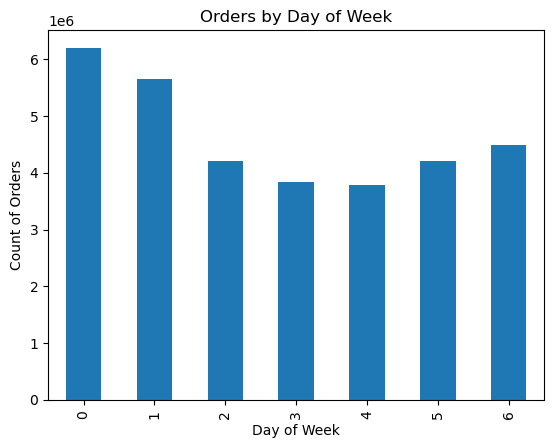

In [12]:
## Bar Chart 
bar_chart_day_of_week = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')

In [13]:
## Export Bar Chart 
bar_chart_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_day_of_week.png'))

Text(0, 0.5, 'Frequency')

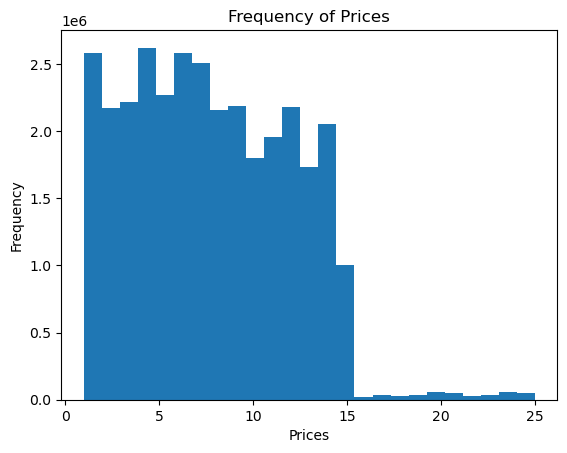

In [25]:
## Histogram 
hist_frequency_of_prices = df_ords_prods_all['prices'].plot.hist(bins = 25)
plt.title('Frequency of Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')

In [40]:
## Save Figure 
hist_frequency_of_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_frequency_of_prices.png'))

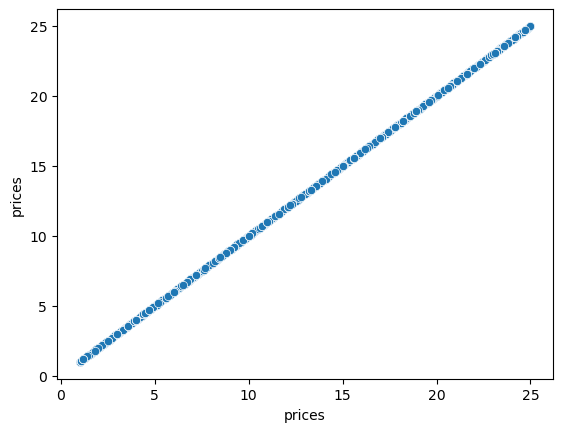

In [36]:
## Scatterplot 
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_all)

Text(0, 0.5, 'Prices')

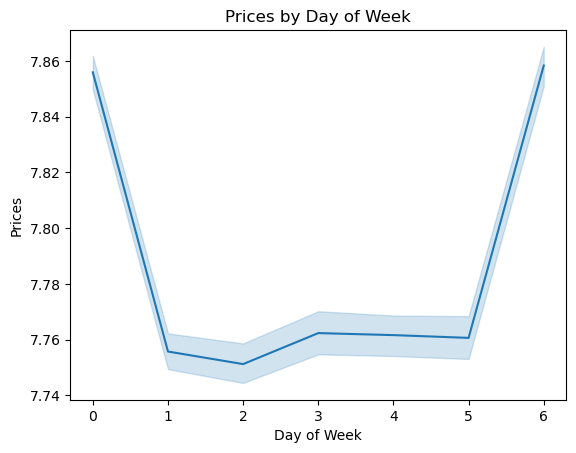

In [20]:
## Line Chart using a sample 
scatterplot_order_day_of_week = sns.lineplot(data = small, x = 'orders_day_of_week', y = 'prices')
plt.title('Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Prices')

## Question 3 - You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Count of Orders')

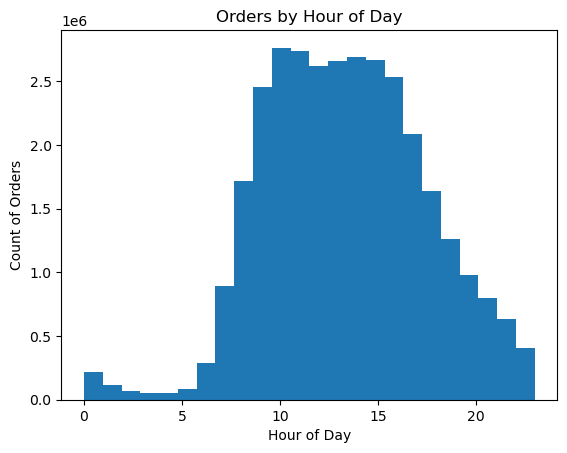

In [14]:
hist_order_hour_of_day = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders')

### Answer: This histogram demonstrates that the most popular hours to order are 0900 - 1600. The least common hours to order are 0000-0500.

## Question 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0, 0.5, 'Count')

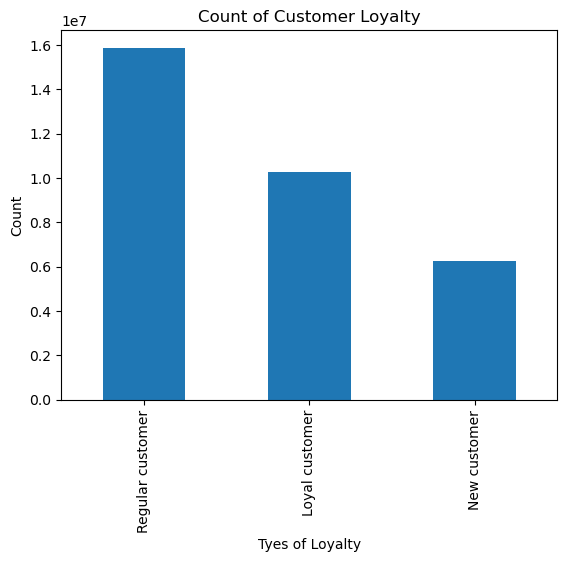

In [34]:
bar_loyalty_flag = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()
plt.title('Count of Customer Loyalty')
plt.xlabel('Tyes of Loyalty')
plt.ylabel('Count')

## Question 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [17]:
## New dataframe with columns I need 
df_2 = small[['prices', 'order_hour_of_day']]

Text(0, 0.5, 'Prices')

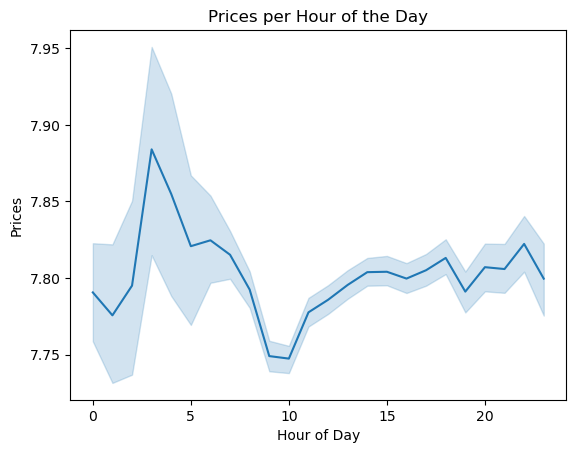

In [18]:
## Line chart 
line_chart_order_hour_of_day = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')
plt.title('Prices per Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')

### Answer - There is no correlation between the hour of the day and what people are spending

## Question 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [32]:
## New dataframe with columns I need 
df_3 = small[['age', 'number_of_dependants']]

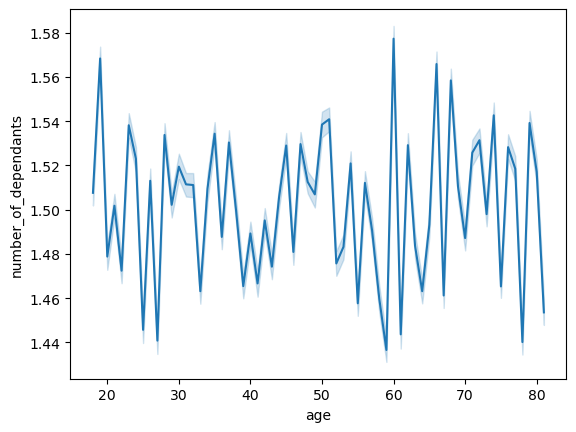

In [33]:
## Line chart 
line_chart_age_marital_status = sns.lineplot(data = df_3, x = 'age', y = 'number_of_dependants')

### Answer: There is no correlation between age and the number of dependants.

## Question 7 - You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

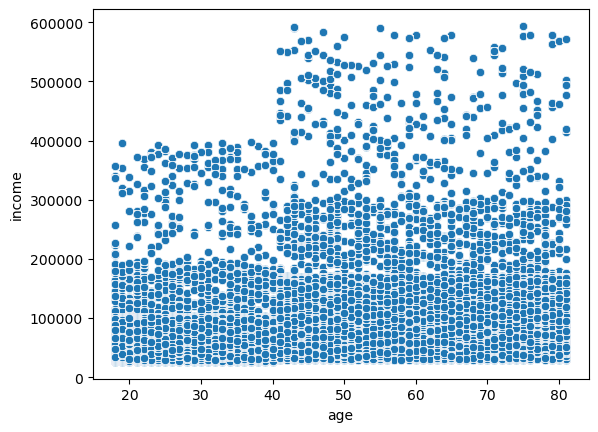

In [34]:
scatterplot_income_age = sns.scatterplot (x = 'age', y = 'income', data = df_ords_prods_all )

### Answer: Overall there is no correlation between age and income. However, after age 40 the number of highest income earners does increase.  

## Question 8 - Export your visualizations as “.png” files in your relevant project folder.

In [37]:
## Saving scatterplot prices 
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices.png'))

In [21]:
## Saving scatterplot_order_day_of_week 
scatterplot_order_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_order_day_of_week.png'))

In [15]:
## Saving hist_order_hour_of_day
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [35]:
## Saving bar_loyalty_flag
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [19]:
## Saving line_chart_order_hour_of_day
line_chart_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_order_hour_of_day.png'))

In [45]:
## Saving line_chart_age_marital_status
line_chart_age_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_marital_status.png'))

In [46]:
## Saving scatterplot_income_age
scatterplot_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_income_age.png'))

## Extra for project

In [21]:
## Import orders products all 3 to make department bar chart 
df_ords_prods_all_3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_3.pkl'))

Text(0, 0.5, 'Number of Purchases')

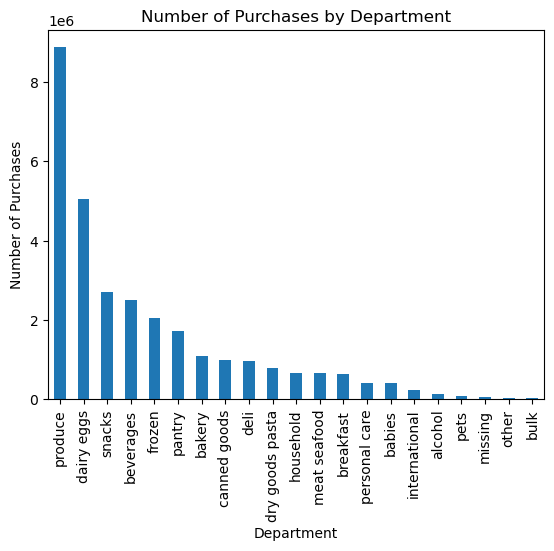

In [33]:
## Bar chart for number of purchases by department  
bar_chart_dept = df_ords_prods_all_3['department'].value_counts().plot.bar()
plt.title('Number of Purchases by Department')
plt.xlabel('Department')
plt.ylabel('Number of Purchases')

In [32]:
## Export and save 
bar_chart_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_dept.png'))

In [61]:
## Crosstab for loyalty status and purchasing habits 
crosstab_2 = pd.crosstab(df_ords_prods_all_3['frequency_flag'], df_ords_prods_all_3['loyalty_flag'], dropna = False)

In [62]:
crosstab_2

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,10279960,1098341,9631222
Non-frequent customer,0,1596516,911475
Regular customer,4133,1315698,5334079


Text(0, 0.5, 'Count')

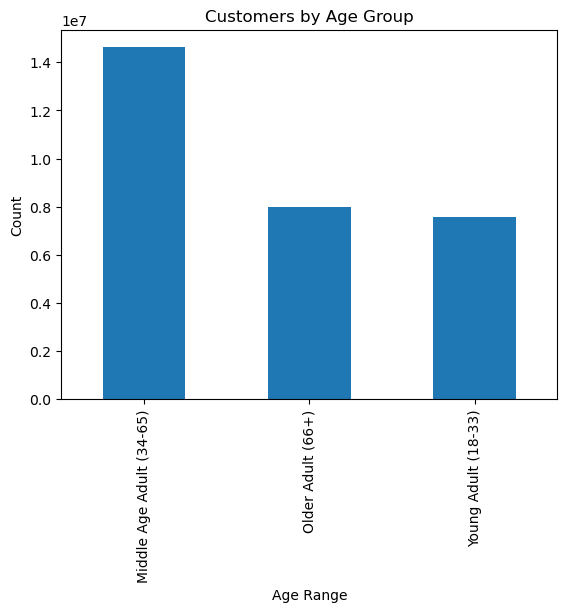

In [68]:
## Bar chart for age range 
bar_chart_frequency_age = df_ords_prods_all_3['age_range'].value_counts().plot.bar()
plt.title('Customers by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

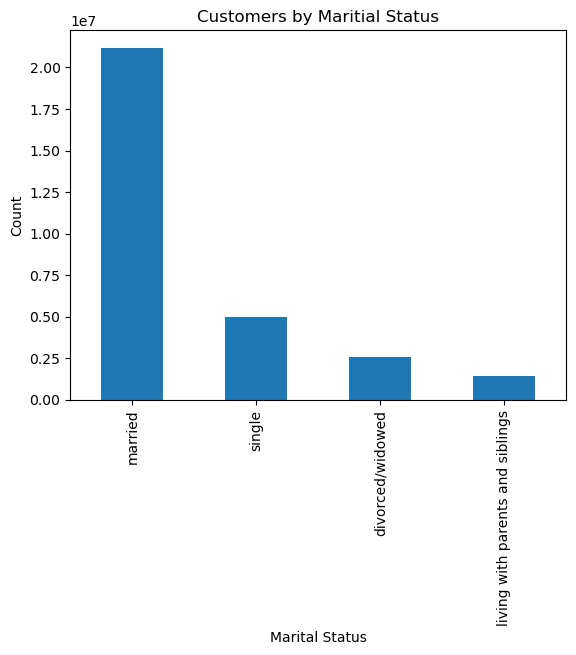

In [78]:
## Bar chart for age range 
bar_chart_frequency_fam_status = df_ords_prods_all_3['fam_status'].value_counts().plot.bar()
plt.title('Customers by Maritial Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

In [79]:
## Export and save 
bar_chart_frequency_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_frequency_fam_status.png'))

In [70]:
## Export and save 
bar_chart_frequency_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_frequency_age.png'))

In [22]:
## Create sample to save memory 
df_ords_prods_all_3 = df_ords_prods_all_3.sample(100000)

In [26]:
## Crosstab for fam_status and age_range for frequent customer 
pd.crosstab(df_ords_prods_all_3['fam_status'][df_ords_prods_all_3['frequency_flag'] == 'Frequent customer'], 
            df_ords_prods_all_3['age_range'][df_ords_prods_all_3['frequency_flag'] == 'Frequent customer'], 
            dropna= False, normalize=True)*100

age_range,Middle Age Adult (34-65),Older Adult (66+),Young Adult (18-33)
fam_status,,,
divorced/widowed,1.991539,6.629349,0.000000
living with parents and siblings,0.000000,0.000000,4.791781
married,36.315365,19.888048,13.911992
single,10.174979,0.000000,6.296946


In [19]:
## Crosstab for fam_status and age_range for non-frequent customer 
pd.crosstab(df_ords_prods_all_3['fam_status'][df_ords_prods_all_3['frequency_flag'] == 'Non-frequent customer'], 
            df_ords_prods_all_3['age_range'][df_ords_prods_all_3['frequency_flag'] == 'Non-frequent customer'], 
            dropna= False, normalize=True)*100

age_range,Middle Age Adult (34-65),Older Adult (66+),Young Adult (18-33)
fam_status,,,
divorced/widowed,1.334951,5.461165,0.000000
living with parents and siblings,0.000000,0.000000,4.368932
married,39.441748,21.723301,12.621359
single,9.101942,0.000000,5.946602


In [20]:
## Crosstab for fam_status and age_range for regular customer 
pd.crosstab(df_ords_prods_all_3['fam_status'][df_ords_prods_all_3['frequency_flag'] == 'Regular customer'], 
            df_ords_prods_all_3['age_range'][df_ords_prods_all_3['frequency_flag'] == 'Regular customer'], 
            dropna= False, normalize=True)*100

age_range,Middle Age Adult (34-65),Older Adult (66+),Young Adult (18-33)
fam_status,,,
divorced/widowed,1.554174,6.705151,0.000000
living with parents and siblings,0.000000,0.000000,5.683837
married,35.657194,19.715808,14.564831
single,10.390764,0.000000,5.728242


Text(0, 0.5, 'Count')

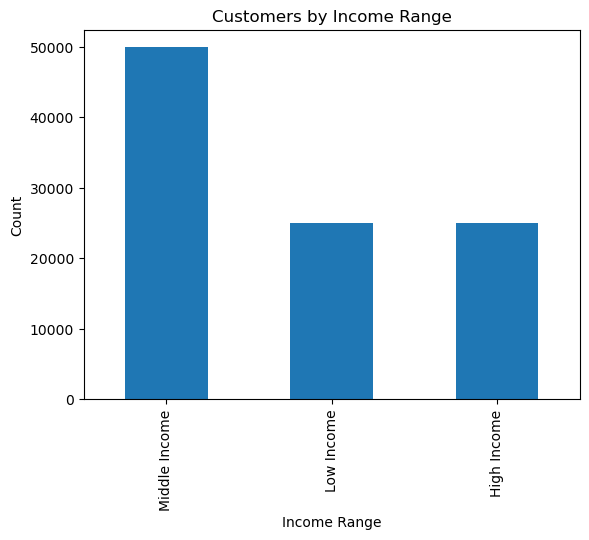

In [29]:
## Bar chart for income range 
bar_chart_frequency_income = df_ords_prods_all_3['income_range'].value_counts().plot.bar()
plt.title('Customers by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')

In [30]:
## Export and save 
bar_chart_frequency_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_frequency_income.png'))

In [32]:
## Create profiling column for single no dependents 
df_ords_prods_all_3.loc[(df_ords_prods_all_3['number_of_dependants'] == 0) & (df_ords_prods_all_3['fam_status'] =='single'), 
                        'customer_profile'] = 'single no dependants'

df_ords_prods_all_3.loc[(df_ords_prods_all_3['number_of_dependants'] == 0) & (df_ords_prods_all_3['fam_status'] =='divorced/widowed'), 
                        'customer_profile'] = 'single no dependants'

df_ords_prods_all_3.loc[(df_ords_prods_all_3['number_of_dependants'] >= 1) & (df_ords_prods_all_3['fam_status'] =='married'), 
                        'customer_profile'] = 'married with children'

df_ords_prods_all_3.loc[(df_ords_prods_all_3['number_of_dependants'] >= 1) & (df_ords_prods_all_3['fam_status'] =='living with parents and siblings'), 
                        'customer_profile'] = 'parents and siblings with children'

In [33]:
## Aggregate department and customer profile 
agg_flag_prof = df_ords_prods_all_3.groupby(['frequency_flag', 'customer_profile']).size().unstack(fill_value=0)

Text(0, 0.5, 'Count')

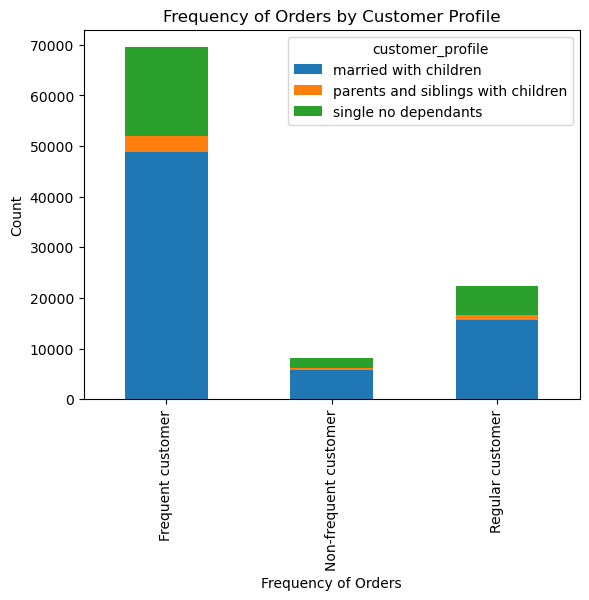

In [36]:
#customer_profile_by_age = 
bar_chart_frequency_customer_profile = agg_flag_prof.plot(kind='bar', stacked = True)
plt.title('Frequency of Orders by Customer Profile')
plt.xlabel('Frequency of Orders')
plt.ylabel('Count')

In [37]:
## Export and save 
bar_chart_frequency_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_frequency_customer_profile.png'))

In [42]:
## Aggregate spending flag and customer profile 
agg_spending = df_ords_prods_all_3.groupby(['spending_flag', 'customer_profile']).size().unstack(fill_value=0)

Text(0, 0.5, 'Count')

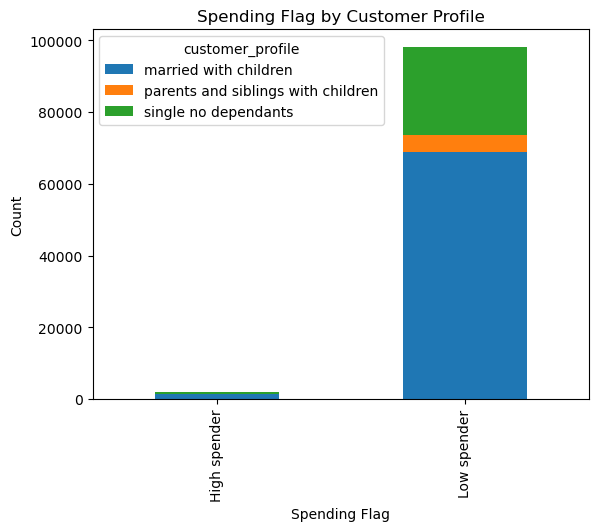

In [43]:
#customer profile by spendingflag = 
bar_chart_frequency_customer_profile = agg_spending.plot(kind='bar', stacked = True)
plt.title('Spending Flag by Customer Profile')
plt.xlabel('Spending Flag')
plt.ylabel('Count')

In [40]:
df_ords_prods_all_3['spending_flag'].unique()

array(['Low spender', 'High spender'], dtype=object)

In [44]:
## Export and save 
bar_chart_frequency_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_frequency_customer_profile.png'))